### **Loading the common repo**

In [2]:
!git clone https://github.com/smitasasindran/eva5utils.git


Cloning into 'eva5utils'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 0), reused 25 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [3]:
%cd eva5utils

/content/eva5utils


In [5]:
!ls

config	dataloaders  main.py  model  test  train  transforms  utils


### **Loading the data**

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
            Conv2d-2           [-1, 25, 32, 32]             100
              ReLU-3           [-1, 25, 32, 32]               0
       BatchNorm2d-4           [-1, 25, 32, 32]              50
            Conv2d-5           [-1, 25, 32, 32]             225
            Conv2d-6           [-1, 50, 32, 32]           1,300
              ReLU-7           [-1, 50, 32, 32]               0
       BatchNorm2d-8           [-1, 50, 32, 32]             100
         MaxPool2d-9           [-1, 50, 16, 16]               0
           Conv2d-10           [-1, 50, 16, 16]             450
           Conv2d-11          [-1, 100, 16, 16]           5,100
             ReLU-12          [-1, 100, 16, 16]               0
      BatchNorm2d-13          [-1, 100, 16, 16]             200
           Conv2d-14          [-1, 100,

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



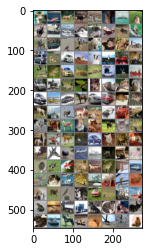

In [7]:
from model import Model7
from utils.helpers import show_model_summary, DEVICE, IS_CUDA, accuracy_per_class
from dataloaders import dataloaders
from transforms import model7_transforms
from utils import plot_samples
from train import train_loop
from test import test_loop
import torch.optim as optim
import torch.nn as nn


model = Model7()
show_model_summary(model.to(DEVICE), (3, 32, 32))

# Constants, put in config
epochs = 50
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4

transforms = model7_transforms()
(train_loader, test_loader, classes) = dataloaders.load_cifar10(transforms, cuda_batch_size, cpu_batch_size, num_workers)

plot_samples(train_loader)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.009, momentum=0.9)


### **Training and test loops**

In [9]:
train_loop(epochs, train_loader, model, DEVICE, optimizer, criterion)


[1,   391] loss: 511.908
[2,   391] loss: 332.954
[3,   391] loss: 265.205
[4,   391] loss: 221.879
[5,   391] loss: 190.359
[6,   391] loss: 164.528
[7,   391] loss: 142.348
[8,   391] loss: 122.084
[9,   391] loss: 104.811
[10,   391] loss: 86.971
[11,   391] loss: 72.796
[12,   391] loss: 59.925
[13,   391] loss: 47.384
[14,   391] loss: 39.931
[15,   391] loss: 31.020
[16,   391] loss: 23.793
[17,   391] loss: 19.016
[18,   391] loss: 14.247
[19,   391] loss: 10.639
[20,   391] loss: 8.018
[21,   391] loss: 5.567
[22,   391] loss: 4.215
[23,   391] loss: 2.878
[24,   391] loss: 2.283
[25,   391] loss: 1.760
[26,   391] loss: 1.498
[27,   391] loss: 1.280
[28,   391] loss: 1.190
[29,   391] loss: 1.020
[30,   391] loss: 0.934
[31,   391] loss: 0.833
[32,   391] loss: 0.777
[33,   391] loss: 0.690
[34,   391] loss: 0.622
[35,   391] loss: 0.615
[36,   391] loss: 0.599
[37,   391] loss: 0.548
[38,   391] loss: 0.510
[39,   391] loss: 0.484
[40,   391] loss: 0.480
[41,   391] loss: 0.4

**Run the test loop**

In [10]:
test_loop(test_loader, model, DEVICE, criterion)


Accuracy of the network on the 10000 test images: 82 %, Test loss: 57.92210000753403


**Showing Accuracy per class**

In [12]:
from utils.helpers import accuracy_per_class
accuracy_per_class(model, classes, test_loader, DEVICE)

Accuracy of plane : 86 %
Accuracy of   car : 88 %
Accuracy of  bird : 76 %
Accuracy of   cat : 64 %
Accuracy of  deer : 92 %
Accuracy of   dog : 79 %
Accuracy of  frog : 82 %
Accuracy of horse : 89 %
Accuracy of  ship : 84 %
Accuracy of truck : 88 %
